# Import libaries that using in the Project

In [ ]:
#pandas use in data analysis 
import pandas as pd
#numpy use to working with arrays
import numpy as np
#matplotlib use in data visualizations
import matplotlib.pyplot as plt
#Seaborn use in data visualization based on matplotlib
import seaborn as sns
#sklearn use in data analysis
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Read the Data that use in project


In [ ]:
#Read the CSV file
data = pd.read_csv("Applais project.csv")
#print the first 5 rows of each column
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188.0,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,NaN,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,NaN,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,NaN,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,NaN,2,14,1208,1212,1411,8,2,15,1,1,0


# find out how many entries there are

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1652 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Check the missing Data

In [ ]:
#calculate the missing data in each column
Missing_data = data.isnull().sum()
#printthe calculated missing data
print(Missing_data)

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt        348
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
dtype: int64


# Replace the null values in Mobile_wt with the Mean 

according to the domain the mobile_wt is important so i dont drop it and i dont null it so i fill it with the mean why the mean not 0 bec there is no mobile have 0 wheight

In [ ]:
#Replace the null values in Mobile_wt with the Mean
data['mobile_wt'] = data['mobile_wt'].fillna(data['mobile_wt'].mean())

# Check for the Dublicates 

In [ ]:
#Check for the Dublicates
duplicates =sum(data.duplicated()) == 0
#print the result of the checking
print(duplicates)

True


# Detect Out layers

In [ ]:
#print the data description and check for the outlayers 
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.325666,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.306029,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,140.325666,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


# Run Cluster analysis 12 times

In [ ]:
#Put from 1 to 12 Clusters in K
K = range(1,12)
#List to save in it clusters inertia
wss = []
for k in K:
  #Predict the closest cluster each sample in K belongs
  kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
  #put data that kmeans work on it
  kmeans=kmeans.fit(data)
  #wss equal to cluster inertia
  wss_iter = kmeans.inertia_
  #add cluster inertia to wss list
  wss.append(wss_iter)

# Store Number of Clusters with their WSS(inetia) scores 

In [ ]:
#create My_Centers data frame to store in cluster and its inertia
My_Centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
#orint My_Centers data frame
print(My_Centers)

    Clusters           WSS
0          1  3.508595e+09
1          2  1.751611e+09
2          3  1.413805e+09
3          4  1.245415e+09
4          5  1.097758e+09
5          6  1.001389e+09
6          7  9.216900e+08
7          8  8.576011e+08
8          9  8.012039e+08
9         10  7.551238e+08
10        11  7.138106e+08


# Plot Elbow Plot

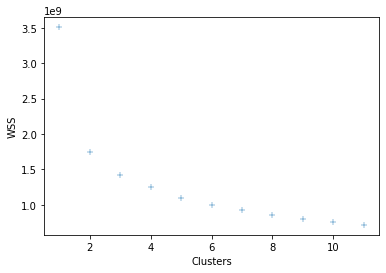

In [ ]:
#plot elbow method to check the number of Clusters needed
#we use the data My_Centers that contain cluster and its inertia
sns.scatterplot(x = 'Clusters', y = 'WSS' , data = My_Centers, marker="+")

# Sihouette Method to identify Clusters

In [ ]:
#this method do more check on elbow method to know number of Clusters needed
for i in range(3,13):
  #Predict the closest cluster each sample in K belongs
  label = cluster.KMeans(n_clusters=i,init='k-means++',random_state=200).fit(data).labels_
  #print the mean Silhouette Coefficient of all samples
  print("Sihouette score for k(clusters) = "+str(i)+" is "
        +str(metrics.silhouette_score(data,label,metric="euclidean",sample_size=1000,random_state=200)))

Sihouette score for k(clusters) = 3 is 0.2783231212220803
Sihouette score for k(clusters) = 4 is 0.26398354399823076
Sihouette score for k(clusters) = 5 is 0.23808140320862406
Sihouette score for k(clusters) = 6 is 0.22493000765672166
Sihouette score for k(clusters) = 7 is 0.22001147018719114
Sihouette score for k(clusters) = 8 is 0.21321694226452348
Sihouette score for k(clusters) = 9 is 0.2148326491526052
Sihouette score for k(clusters) = 10 is 0.21065308646057884
Sihouette score for k(clusters) = 11 is 0.20945668926578423
Sihouette score for k(clusters) = 12 is 0.2138719450673272


# Apply K-means

In [ ]:
#number_clusters = 3 that calculated from Elbow and Sihouette method
number_clusters = 3
#apply k-means on data
kmeans = cluster.KMeans(n_clusters=number_clusters,init='k-means++')
kmeans = kmeans.fit(data)

# Add column Clusters to the data

In [ ]:
#Add column Clusters to the data
#that contain each row belongs to any clusters
data['Clusters'] = kmeans.labels_

# View the data after adding Clusters column

In [ ]:
#View the data after adding Clusters column
data.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Clusters
0,842,0,2.2,0,1,0,7,0.6,188.000000,2,...,20,756,2549,9,7,19,0,0,1,2
1,1021,1,0.5,1,0,1,53,0.7,140.325666,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,140.325666,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,140.325666,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,140.325666,2,...,1208,1212,1411,8,2,15,1,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164.000000,1,...,1004,1654,1067,17,1,10,1,0,0,0
6,1821,0,1.7,0,4,1,10,0.8,140.325666,8,...,381,1018,3220,13,8,18,1,0,1,1
7,1954,0,0.5,1,0,0,24,0.8,187.000000,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174.000000,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93.000000,5,...,1137,1224,513,19,10,12,1,0,0,0


# Pairplot Graph

In [ ]:
#plot pairplot gragh to the data 
#to decide which coulmn that affect by cluster column
#sns.pairplot(data)

# Import data set that use in logistic regression

after i draw the pair plot it appeard that clusters coulmn affect to another column in domain such as(battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram	sc_h,sc_w,talk_time) 

In [ ]:
#import the columns that affect by cluster column
X = data.iloc[:, [0,2,4,6,7,8,9,10,11,12,13,14,15]].values
#import cluster column
y = data.iloc[:, 20].values

# logistic Regression using Sk learn

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 200)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#classifier acording to logistic regression
classifier = LogisticRegression(random_state = 200)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=200)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In terms of syntax accuracy,approximately 99 precent of telephone specifications were found to meet al tha domain requirements

In [ ]:
#do the classification report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       1.00      0.99      1.00       149
           2       0.99      1.00      0.99       167

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

